In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


입력 데이터를 판다스 데이터프레임으로 저장한다.  
입력 데이터는 음식 관련 및 스포츠 관련 지문으로 구성되어 있다.

In [3]:
paragraph_dict_list = [
     {'paragraph': 'Dishplace is located in sunnyvale downtown there is parking around the area but it can be difficult to find during peak business hours my sisters and i came to this place for dinner on a weekday they were really busy so i highly recommended making reservations unless you have the patience to wait', 'category': 'food'},
     {'paragraph': 'Srvice can be slower during busy hours but our waiter was courteous and help gave some great entree recommendations', 'category': 'food'},
     {'paragraph': 'Portions are huge both french toast and their various omelettes are really good their french toast is probably 1.5x more than other brunch places great place to visit if you are hungry and dont want to wait 1 hour for a table', 'category': 'food'},
     {'paragraph': 'We started with apps going the chicken and waffle slides and chicken nachos the sliders were amazing and the nachos were good too maybe by themselves the nachos would have scored better but after those sliders they were up against some tough competition', 'category': 'food'},
     {'paragraph': 'The biscuits and gravy was too salty two people in my group had the gravy and all thought it was too salty my hubby ordered a side of double egg and it was served on two small plates who serves eggs to one person on separate plates we commented on that when it was delivered and even the server laughed and said she doesnt know why the kitchen does that presentation of food is important and they really missed on this one', 'category': 'food'},
     {'paragraph': 'The garlic fries were a great starter (and a happy hour special) the pancakes looked and tasted great and were a fairly generous portion', 'category': 'food'},
     {'paragraph': 'Our meal was excellent i had the pasta ai formaggi which was so rich i didnt dare eat it all although i certainly wanted to excellent flavors with a great texture contrast between the soft pasta and the crisp bread crumbs too much sauce for me but a wonderful dish', 'category': 'food'},
     {'paragraph': 'What i enjoy most about palo alto is so many restaurants have dog-friendly seating outside i had bookmarked italico from when they first opened about a 1.5 years ago and was jonesing for some pasta so time to finally knock that bookmark off', 'category': 'food'},
     {'paragraph': 'The drinks came out fairly quickly a good two to three minutes after the orders were taken i expected my iced tea to taste a bit more sweet but this was straight up green tea with ice in it not to complain of course but i was pleasantly surprised', 'category': 'food'},
     {'paragraph': 'Despite the not so good burger the service was so slow the restaurant wasnt even half full and they took very long from the moment we got seated to the time we left it was almost 2 hours we thought that it would be quick since we ordered as soon as we sat down my coworkers did seem to enjoy their beef burgers for those who eat beef however i will not be returning it is too expensive and extremely slow service', 'category': 'food'},

     {'paragraph': 'The four reigning major champions simona halep caroline wozniacki angelique kerber and defending us open champion sloane stephens could make a case for being the quartet most likely to succeed especially as all but stephens has also enjoyed the no1 ranking within the last 14 months as they prepare for their gruelling new york campaigns they currently hold the top four places in the ranks', 'category': 'sports'},
     {'paragraph': 'The briton was seeded nn7 here last year before a slump in form and confidence took her down to no46 after five first-round losses but there have been signs of a turnaround including a victory over a sub-par serena williams in san jose plus wins against jelena ostapenko and victoria azarenka in montreal. konta pulled out of new haven this week with illness but will hope for good things where she first scored wins in a major before her big breakthroughs to the semis in australia and wimbledon', 'category': 'sports'},
     {'paragraph': 'Stephens surged her way back from injury in stunning style to win her first major here last year—and ranked just no83 she has since proved what a big time player she is winning the miami title via four fellow major champions then reaching the final at the french open back on north american hard courts she ran to the final in montreal only just edged out by halep she has also avoided many of the big names in her quarter—except for wild card azarenka as a possible in the third round', 'category': 'sports'},
     {'paragraph': 'When it came to england chances in the world cup it would be fair to say that most fans had never been more pessimistic than they were this year after enduring years of truly dismal performances at major tournaments – culminating in the 2014 event where they failed to win any of their three group games and finished in bottom spot those results led to the resignation of manager roy hodgson', 'category': 'sports'},
     {'paragraph': 'The team that eliminated russia – croatia – also improved enormously during the tournament before it began their odds were 33/1 but they played with real flair and star players like luka modric ivan rakitic and ivan perisic showed their quality on the world stage having displayed their potential by winning all three of their group stage games croatia went on to face difficult tests like the semi-final against england', 'category': 'sports'},
     {'paragraph': 'The perseyside outfit finished in fourth place in the premier league table and without a trophy last term after having reached the champions league final before losing to real madrid', 'category': 'sports'},
     {'paragraph': 'Liverpool fc will return to premier league action on saturday lunchtime when they travel to leicester city in the top flight as they look to make it four wins in a row in the league', 'category': 'sports'},
     {'paragraph': 'Alisson signed for liverpool fc from as roma this summer and the brazilian goalkeeper has helped the reds to keep three clean sheets in their first three premier league games', 'category': 'sports'},
     {'paragraph': 'But the rankings during that run-in to new york hid some very different undercurrents for murray had struggled with a hip injury since the clay swing and had not played a match since losing his quarter-final at wimbledon and he would pull out of the us open just two days before the tournament began—too late however to promote nederer to the no2 seeding', 'category': 'sports'},
     {'paragraph': 'Then came the oh-so-familiar djokovic-nadal no-quarter-given battle for dominance in the third set there were exhilarating rallies with both chasing to the net both retrieving what looked like winning shots nadal more than once pulled off a reverse smash and had his chance to seal the tie-break but it was djokovic serving at 10-9 who dragged one decisive error from nadal for a two-sets lead', 'category': 'sports'}
]
df = pd.DataFrame(paragraph_dict_list)
df = df[['paragraph', 'category']]

In [4]:
df.head(5)

,paragraph,category
0,Dishplace is located in sunnyvale downtown the...,food
1,Srvice can be slower during busy hours but our...,food
2,Portions are huge both french toast and their ...,food
3,We started with apps going the chicken and waf...,food
4,The biscuits and gravy was too salty two peopl...,food


In [5]:
df.tail(5)

,paragraph,category
15,The perseyside outfit finished in fourth place...,sports
16,Liverpool fc will return to premier league act...,sports
17,Alisson signed for liverpool fc from as roma t...,sports
18,But the rankings during that run-in to new yor...,sports
19,Then came the oh-so-familiar djokovic-nadal no...,sports


데이터 전처리  
LSTM 모델이 입력 데이터를 처리할 수 있도록 수치값으로 변경한다.  
텍스트인 입력값을 수치로 변경하기 위해 지문에 사용된 모든 단어들을 모아서 중복을 제거한 후 단어 리스트를 만든다.

In [8]:
# 중복을 제거해서 지문에 사용된 단어를 모으기 위해 빈 set을 선언한다.
results = set()
# 판다스의 Series 객체 => 1차원 배열과 같은 자료구조로 index가 같이 출력된다.
# print(type(df))                  # <class 'pandas.core.frame.DataFrame'>
# print(type(df['paragraph']))     # <class 'pandas.core.series.Series'>
# print(type(df['paragraph'].str)) # <class 'pandas.core.strings.accessor.StringMethods'>
# print(type(df['paragraph'].str.lower()))             # <class 'pandas.core.series.Series'>
# print(type(df['paragraph'].str.lower().str))         # <class 'pandas.core.strings.accessor.StringMethods'>
# print(type(df['paragraph'].str.lower().str.split())) # <class 'pandas.core.series.Series'>
# print(type(df['paragraph'].str.lower().str.split().apply(results.update))) # class 'pandas.core.series.Series'>
# 데이터프레임의 'paragraph' 열(Series 객체)를 모두 소문자로 변환한 후 공백을 경계로 나눠서 set에 저장한다.
df['paragraph'].str.lower().str.split().apply(results.update)
print(len(results))
print(results)

537
{'expected', 'although', 'began—too', 'montreal', 'quarter-final', 'pasta', 'better', 'liverpool', 'hid', 'displayed', 'premier', 'chasing', 'soon', 'great', 'stunning', 'over', 'as', 'who', 'but', 'happy', 'left', 'clay', 'soft', 'finished', 'tea', 'other', 'clean', 'never', 'lunchtime', 'had', 'travel', 'succeed', 'one', 'of', 'dismal', 'very', 'exhilarating', 'did', 'complain', 'huge', 'fourth', '(and', 'sweet', 'haven', 'players', 'tests', 'visit', 'gravy', 'wins', 'way', 'just', 'up', 'two', 'kerber', 'luka', 'konta', 'net', 'here', 'bit', 'results', 'last', 'formaggi', 'full', 'too', 'almost', 'out', 'reached', 'doesnt', 'jose', 'taken', 'things', 'half', 'presentation', 'briton', 'bookmarked', 'england', 'laughed', 'all', 'rich', 'four', 'more', 'competition', 'within', 'losses', 'perisic', 'team', 'from', 'returning', 'san', 'pleasantly', 'which', 'despite', 'delivered', 'enduring', 'hold', 'confidence', 'being', 'match', 'hour', 'find', 'north', 'played', 'campaigns', 'res

In [12]:
# set에 저장된 데이터를 아래와 같은 형태의 딕셔너리로 변환한다.
# {0: 'expected', 1: 'although', 2: 'began—too', ..., 534: 'is', 535: 'prepare', 536: 'pull'}
# enumerate() : 인수로 지정된 객체의 인덱스와 데이터를 리턴한다.
# for index, word in enumerate(results):
    # print(index, word)
idx2word = dict(enumerate(results))
# print(type(idx2word))
# print(idx2word)
# {index: word, ...} 형태의 딕셔너리를 아래와 같은 {word: index} 형태의 딕셔너리로 변환한다.
# {'expected': 0, 'although': 1, 'began—too': 2, ..., 'is': 534, 'prepare': 535, 'pull': 536}

word2idx = {value: key for key, value in idx2word.items()}
print(type(word2idx))
print(word2idx)

<class 'dict'>
{'expected': 0, 'although': 1, 'began—too': 2, 'montreal': 3, 'quarter-final': 4, 'pasta': 5, 'better': 6, 'liverpool': 7, 'hid': 8, 'displayed': 9, 'premier': 10, 'chasing': 11, 'soon': 12, 'great': 13, 'stunning': 14, 'over': 15, 'as': 16, 'who': 17, 'but': 18, 'happy': 19, 'left': 20, 'clay': 21, 'soft': 22, 'finished': 23, 'tea': 24, 'other': 25, 'clean': 26, 'never': 27, 'lunchtime': 28, 'had': 29, 'travel': 30, 'succeed': 31, 'one': 32, 'of': 33, 'dismal': 34, 'very': 35, 'exhilarating': 36, 'did': 37, 'complain': 38, 'huge': 39, 'fourth': 40, '(and': 41, 'sweet': 42, 'haven': 43, 'players': 44, 'tests': 45, 'visit': 46, 'gravy': 47, 'wins': 48, 'way': 49, 'just': 50, 'up': 51, 'two': 52, 'kerber': 53, 'luka': 54, 'konta': 55, 'net': 56, 'here': 57, 'bit': 58, 'results': 59, 'last': 60, 'formaggi': 61, 'full': 62, 'too': 63, 'almost': 64, 'out': 65, 'reached': 66, 'doesnt': 67, 'jose': 68, 'taken': 69, 'things': 70, 'half': 71, 'presentation': 72, 'briton': 73, 'bo

In [20]:
print(word2idx['one'], word2idx['week'])
print(word2idx['bread'])
print(word2idx['tournament'])

32 500
143
188


word2idx 딕셔너리를 활용해서 모든 지문을 수치로 전환한다.

In [26]:
# 지문을 구성하는 모든 단어를 수치로 전환하는 함수를 만든다.
def encode_paragraph(paragraph):
    words = paragraph.split(' ')
    encoded = []
    for word in words:
        encoded.append([word2idx[word.lower()]])
    return encoded

# 지문이 수치로 변환된 결과를 데이터프레임에 추가한다.
df['enc_paragraph'] = df.paragraph.apply(encode_paragraph) # input
df.head()

,paragraph,category,enc_paragraph
0,Dishplace is located in sunnyvale downtown the...,food,"[[365], [534], [207], [434], [127], [373], [21..."
1,Srvice can be slower during busy hours but our...,food,"[[410], [479], [277], [246], [287], [452], [13..."
2,Portions are huge both french toast and their ...,food,"[[199], [244], [39], [346], [120], [295], [222..."
3,We started with apps going the chicken and waf...,food,"[[409], [238], [429], [274], [152], [319], [14..."
4,The biscuits and gravy was too salty two peopl...,food,"[[319], [303], [222], [47], [308], [63], [114]..."


분류 항목(food[1, 0], sports[0, 1])을 one hot encoding으로 수치로 변경한다.

In [28]:
# 분류 항목을 one hot encoding으로 변환하는 함수를 만든다.
def encode_category(category):
    if category == 'food':
        return [1, 0]
    else:
        return [0, 1]
    
# 분류 항목이 one hot encoding으로 변환된 결과를 데이터프레임에 추가한다.
df['enc_category'] = df.category.apply(encode_category) # target, label, class
df

,paragraph,category,enc_paragraph,enc_category
0,Dishplace is located in sunnyvale downtown the...,food,"[[365], [534], [207], [434], [127], [373], [21...","[1, 0]"
1,Srvice can be slower during busy hours but our...,food,"[[410], [479], [277], [246], [287], [452], [13...","[1, 0]"
2,Portions are huge both french toast and their ...,food,"[[199], [244], [39], [346], [120], [295], [222...","[1, 0]"
3,We started with apps going the chicken and waf...,food,"[[409], [238], [429], [274], [152], [319], [14...","[1, 0]"
4,The biscuits and gravy was too salty two peopl...,food,"[[319], [303], [222], [47], [308], [63], [114]...","[1, 0]"
5,The garlic fries were a great starter (and a h...,food,"[[319], [501], [470], [220], [172], [13], [441...","[1, 0]"
6,Our meal was excellent i had the pasta ai form...,food,"[[115], [387], [308], [329], [519], [29], [319...","[1, 0]"
7,What i enjoy most about palo alto is so many r...,food,"[[375], [519], [156], [296], [241], [428], [45...","[1, 0]"
8,The drinks came out fairly quickly a good two ...,food,"[[319], [335], [292], [65], [124], [430], [172...","[1, 0]"
9,Despite the not so good burger the service was...,food,"[[91], [319], [525], [492], [518], [431], [319...","[1, 0]"


Dynamic RNN은 입력값의 다양한 길이를 고려하여 결과값을 출력하므로 Dynamic RNN이 각 입력값의 실제 길이(단어수)를 할 수 있도록 각 지문별 단어수를 미리 계산해둔다.

In [29]:
# 지문을 구성하는 단어의 개수를 세는 함수를 만든다.
def word_cnt(paragraph):
    return len(paragraph.split(' '))

# 지문을 구성하는 단어의 개수를 데이터프레임에 추가한다.
df['seq_length'] = df.paragraph.apply(word_cnt)
df

,paragraph,category,enc_paragraph,enc_category,seq_length
0,Dishplace is located in sunnyvale downtown the...,food,"[[365], [534], [207], [434], [127], [373], [21...","[1, 0]",53
1,Srvice can be slower during busy hours but our...,food,"[[410], [479], [277], [246], [287], [452], [13...","[1, 0]",19
2,Portions are huge both french toast and their ...,food,"[[199], [244], [39], [346], [120], [295], [222...","[1, 0]",42
3,We started with apps going the chicken and waf...,food,"[[409], [238], [429], [274], [152], [319], [14...","[1, 0]",43
4,The biscuits and gravy was too salty two peopl...,food,"[[319], [303], [222], [47], [308], [63], [114]...","[1, 0]",82
5,The garlic fries were a great starter (and a h...,food,"[[319], [501], [470], [220], [172], [13], [441...","[1, 0]",24
6,Our meal was excellent i had the pasta ai form...,food,"[[115], [387], [308], [329], [519], [29], [319...","[1, 0]",50
7,What i enjoy most about palo alto is so many r...,food,"[[375], [519], [156], [296], [241], [428], [45...","[1, 0]",43
8,The drinks came out fairly quickly a good two ...,food,"[[319], [335], [292], [65], [124], [430], [172...","[1, 0]",49
9,Despite the not so good burger the service was...,food,"[[91], [319], [525], [492], [518], [431], [319...","[1, 0]",82


텐서플로우의 RNN은 항상 같은 길이의 시퀀스를 받아야 한다.  
길이가 작은 입력 시퀀스는 패딩을 추가적으로 넣어 모든 시퀀스의 길이를 동일하게 설정한다.  
패딩이 RNN 계산에 영향을 끼치지 않도록 Dynamic RNN은 패딩 이전의 입력 시퀀스의 실제 길이를 파라미터로 받아 상태값 계산시 패딩을 제외시킨다.

In [42]:
# 최고로 긴 지문의 단어 수를 구한 후 모든 지문에 패딩을 집어넣어 최고로 긴 지문과 동일한 길이를 갖도록 만들기 위해 최고로 긴
# 지문의 단어수를 계산한다.
max_word_cnt = 0
for row in df['paragraph']:
    if len(row.split(' ')) > max_word_cnt:
        max_word_cnt = len(row.split(' '))
# for seq in df['seq_length']:
    # if seq > max_word_cnt:
        # max_word_cnt = seq
# max_word_cnt = df.seq_length.max()
print(max_word_cnt)

91


In [49]:
# 모든 지문에 패딩을 집어넣어 최고로 긴 지문과 동일한 길이를 갖게하는 함수를 만든다.
def sequence_padding(enc_paragraph):
    seq_length = len(enc_paragraph)
    for i in range(seq_length, max_word_cnt):
        enc_paragraph.append([-1]) # 패딩을 넣는다.
    return enc_paragraph

# 모든 지문에 패딩이 적용된 결과를 데이터프레임에 적용한다.
df['enc_paragraph'] = df.enc_paragraph.apply(sequence_padding)
# 패딩이 적용된 문장을 확인한다.
print(df['enc_paragraph'][11])
print(df['enc_paragraph'][12])

[[319], [73], [308], [336], [474], [57], [60], [415], [116], [172], [462], [434], [271], [222], [95], [468], [521], [426], [162], [117], [280], [150], [253], [83], [18], [215], [202], [283], [331], [33], [172], [461], [176], [172], [273], [15], [172], [245], [174], [142], [434], [88], [68], [227], [48], [320], [198], [165], [222], [432], [250], [434], [190], [55], [433], [65], [33], [408], [43], [310], [500], [429], [386], [18], [255], [391], [251], [518], [70], [476], [131], [256], [166], [48], [434], [172], [160], [116], [521], [489], [437], [162], [319], [511], [434], [201], [222], [111], [-1], [-1], [-1]]
[[413], [206], [521], [49], [242], [86], [338], [434], [14], [448], [162], [414], [521], [256], [160], [57], [60], [290], [157], [50], [340], [131], [348], [325], [341], [375], [172], [489], [113], [313], [131], [534], [370], [319], [234], [122], [204], [79], [368], [160], [451], [147], [398], [319], [132], [291], [319], [120], [249], [242], [289], [100], [421], [175], [266], [131

In [54]:
enc_paragraph = np.array(df.enc_paragraph.tolist()) # 입력값
print(type(df.enc_paragraph))
print(type(df.enc_paragraph.tolist()))
print(type(enc_paragraph))
enc_category = np.array(df.enc_category.tolist())   # 실제값
seq_length = np.array(df.seq_length.tolist())       # Dynamic RNN의 2번째 파라미터

train_X = enc_paragraph
print(train_X.shape)
train_Y = enc_category
print(train_Y.shape)

<class 'pandas.core.series.Series'>
<class 'list'>
<class 'numpy.ndarray'>
(20, 91, 1)
(20, 2)


텐서플로우로 지문을 읽고 주제를 분류하는 모델을 구현한다.

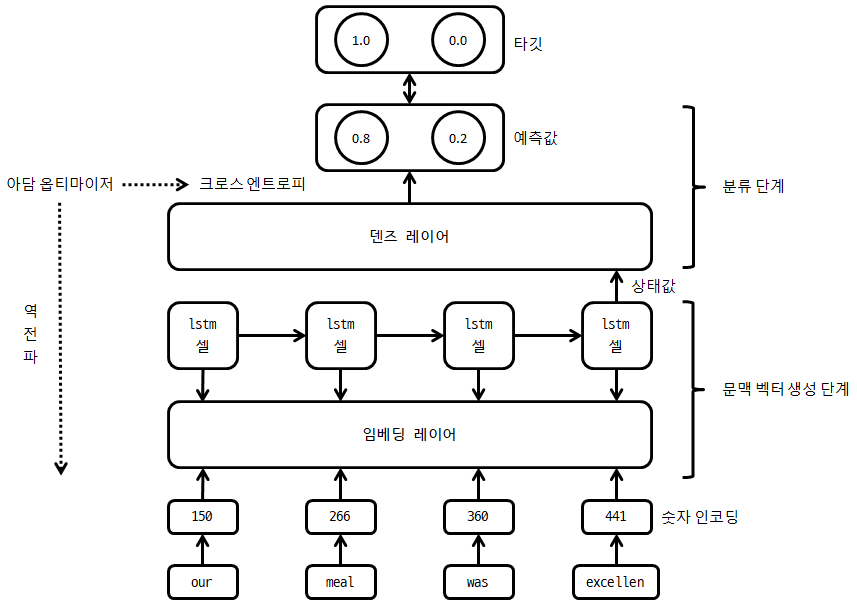

In [57]:
from IPython.display import Image
Image('lstm3.png', width='800')